In [6]:
import pandas as pd
import os
from statistics import mean
import matplotlib.pyplot as plot
import funkcije

pot_plitka = os.getcwd()
pot_globoka =  os.path.join(pot_plitka, 'podatkovna_baza')
pot_sahisti = os.path.join(pot_plitka, 'sahisti')

Preden začnemo z analizo podatkov opazimo, da so nekatera imena v podatkovni bazi podvojena; primer je Garry Kasparov ter Gary Kasparov. Do tega pride, ker so občasno imena v FIDE podatkovni bazi zapisana z kakšno črko razlike ali pa z dodatnim/odvečnim drugim imenom.

Ker pa si želimo, da podatke, ki očitno pripadajo istemu šahistu analiziramo kot take, bomo vse .csv datoteke, za katere menimo, da predstavljajo istega šahista, združili. Najprej zberemo imena, za katera mislimo, da pripadajo isti osebi v seznam seznamov imen.

In [10]:
ekvivalence = [['Kasparov, Gary', 'Kasparov, Garry'], ['Bologan, Victor', 'Bologan, Viktor'], ['Bruzon, Lazaro', 'Bruzon Batista, Lazaro'], ['Dreev, Alexey', 'Dreev, Aleksey'], ['Harikrishna, Pentala', 'Harikrishna, P'], ['Iturrizaga, Eduardo', 'Iturrizaga Bonelli, Eduardo'], ['Ivanchuk, Vassily', 'Ivanchuk, Vasyl'], ['Kobalia, Mikhail', 'Kobalija, Mihail'], ['Mamedyarov, Shakhriyar', 'Mamedyarov, Shakhriyaz'], ['Narayanan S L', 'NarayananSL'], ['Polgar, Judit (GM)', 'Polgar, Judit']]
posebej = [['Shankland, Sam', 'Shankland, Samuel', 'Shankland, Samuel L']]
for ekvivalentna_imena in ekvivalence:
    prihodnje_ime = ekvivalentna_imena[0]
    prvi_podatki = pd.read_csv(funkcije.ime_v_pot(ekvivalentna_imena[0]), index_col = 'datum')
    drugi_podatki = pd.read_csv(funkcije.ime_v_pot(ekvivalentna_imena[1]), index_col = 'datum')
    os.remove(funkcije.ime_v_pot(ekvivalentna_imena[0]))
    os.remove(funkcije.ime_v_pot(ekvivalentna_imena[1]))
    zdruzen_data_frame = pd.merge(prvi_podatki, drugi_podatki, on='datum', how = 'inner')
    zdruzen_data_frame.to_csv(funkcije.ime_v_pot(prihodnje_ime), index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\hugot\\Documents\\FMF\\1_letnik\\UVP-projektna-naloga\\podatkovna_baza\\NaranyanSL'

Analizirali bomo naslednje:
- pri kateri starosti šahisti dosežejo svoj največji ELO (ter ali je ta podatek odvisen od tega kako dober je šahist)
- vpliv nacionalnosti to kdaj šahist doseže svoj največji ELO
- korelacija med ratingom (število točk ELO) in rankom (katero mesto zaseda šahist na lestvici najboljših 100)

Zanima nas pri kateri starosti šahisti dosežejo svoj vrhunec. Postopek, da pridobimo to informacijo bo naslednji:
1. Ustvarili bomo kopijo seznama sahisti ter v to kopijo shranili podatke o tem pri kateri starosti šahist doseže svoj največji ELO rating; podobno bomo naredili tudi z podatkom pri kateri starosti šahist doseže svoj največji indeks na lestvici najboljših 100 šahistov. Ta podatka nista nujno enakovredna, zaradi rating inflationa ([relevanten wikipedia snippet](https://en.wikipedia.org/wiki/Elo_rating_system#Mathematical_details)).
2. Statistično analizirali to - verjetno z preprosto aritmetično sredino.
3. Grafični prikaz podatkov.

In [ ]:
#Napišimo program, ki zbere vse šahiste, ki so bili v top k-mestih; ter naloži njihove podake v slovar
def podatki_top_nekaj(k):
    podatki_sahistov_v_top_nekaj = {}
    sahisti = pd.read_csv(pot_sahisti, index_col= 'Ime')
    for ime, vrstica in sahisti.iterrows():
        if ime == 'Leto rojstva\'' or ime == 'Leto rojstva':
            pass
        else:
            podatki = pd.read_csv(funkcije.ime_v_pot(ime))
            for indeks, vrstica2 in podatki.iterrows():
                if vrstica2.iloc[3] <= 5:
                    podatki_sahistov_v_top_nekaj[(ime, int(vrstica['Leto rojstva']))] = podatki
    return podatki_sahistov_v_top_nekaj

#Vidimo, da je v zadnjih 24 letih 30 različnih šahistov zavzelo mesta med najboljšimi petimi. Zanimivo se je

#Narišimo sedaj še diagram
#Najprej naložimo podatke vsakega izmed šahistov:


#Sedaj podatke grafično predstavimo

# plot.figure(figsize=(10,6))

for kljucni_nabor, podatki in podatki_top_nekaj(5).items():
    #Seznam podatkov o datumih nadomestimo z seznamom podatkov starosti posameznega šahista
    podatki_starost = [round(funkcije.datum_v_float(datum) - kljucni_nabor[1],2) for datum in podatki['datum']]
    plot.plot(podatki_starost, podatki['rating'], label = kljucni_nabor[0])
plot.title('Rating v odvisnosti od starosti za šahiste med top 5 preteklih 24 let')
plot.legend(loc =  'upper left', bbox_to_anchor=(1,1))
plot.show()

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\hugot\\Documents\\FMF\\1_letnik\\UVP-projektna-naloga\\podatkovna_baza\\Bologan,_Viktor'

Diagram žal ni najbolj berljiv. Kako pa se obnaša povprečje teh šahistov pri vsaki starosti?

In [ ]:
#Ker bomo analizirali starost pri kateri igralci dosežejo maksimalni rating v odvisnosti od države, moramo pobrati tudi podatke o slednjem.
#Pojavi se vprašanje kaj storiti, če šahist v svoji karieri igra za več kot eno državo. V okviru tega projekta bomo vse dosežke tega šahista upoštevali pod državo za katero je igral najprej.

stevec_drzav = {}
sahisti_elo = []

for filename in os.listdir(p.pot_globoka):
    ime_sahista = filename.replace('_', ' ')
    trenutni_maksimum = [('01-2000', 0)]
    datotecna_pot = os.path.join(p.pot_globoka, filename)
    podatki = pd.read_csv(datotecna_pot, index_col = 'datum', sep = ',')
    for datum, vrstica in podatki.iterrows():
        rating = int(vrstica['rating'])
        if rating > trenutni_maksimum[0][1]:
            trenutni_maksimum = [(str(datum), rating)]
        elif rating == trenutni_maksimum[0][1]:
            trenutni_maksimum.append((str(datum), rating))
    drzava = vrstica['drzava']
    if drzava in stevec_drzav.keys():
        stevec_drzav[drzava] += 1
    else:
        stevec_drzav[drzava] = 1
    sahisti_elo.append({'Ime': ime_sahista, 'Maksimumi' : trenutni_maksimum, 'Drzava' : vrstica['drzava']})
#sahisti_elo je seznam slovarjev, vsebujoc informacje o imenu, najvišjem ratnigu (oz pri kateri starosti ga je dosegel) ter državljanstvu 

print(sahisti_elo)
print(stevec_drzav)

#Sedaj bomo v seznam slovarjev sahisti_elo za vsakega šahista dodali še starost, pri kateri je dosegel maksimalni rating, če je teh več pa več starosti.
sahisti_csv_format = pd.read_csv(os.path.join(p.pot_plitka, 'sahisti'), sep=',')

for sahist in sahisti_elo:
    ime_sahista = sahist['Ime']
    maksimumi = sahist['Maksimumi']
    sahist['Najvišji rating'] = maksimumi[0][1]
    sahist['Starosti ob najvišjih ratingih'] = []
    #Opomnik: Maksimumi je seznam nizov dveh podatkov, prvi je datum, drugi pa maksimalni elo šahista
    for indeks, vrstica in sahisti_csv_format.iterrows():
        if vrstica['Ime'] == ime_sahista:
            sahist['Leto rojstva'] = vrstica['Leto rojstva']
    for maksimum in maksimumi:
        sahist['Starosti ob najvišjih ratingih'].append(int(maksimum[0][3:]) - sahist['Leto rojstva'])
    sahist['Povprečna starost pri najvišjem ratingu'] = round(mean(sahist['Starosti ob najvišjih ratingih']), 1)
    sahist['Najmlajša starost pri najvišjem ratingu'] = min(sahist['Starosti ob najvišjih ratingih'])
    sahist['Največja starost pri najvišjem ratingu'] = max(sahist['Starosti ob najvišjih ratingih'])
sahisti_elo_pandas = pd.DataFrame(sahisti_elo, columns=['Ime', 'Leto rojstva','Drzava', 'Najvišji rating', 'Povprečna starost pri najvišjem ratingu', 'Najmlajša starost pri najvišjem ratingu', 'Največja starost pri najvišjem ratingu'])

sahisti_elo_pandas.head(250)

[{'Ime': 'Abasov, Nijat', 'Maksimumi': [('11-2023', 2679), ('10-2023', 2679)], 'Drzava': 'AZE'}, {'Ime': 'Abdusattorov, Nodirbek', 'Maksimumi': [('07-2024', 2769)], 'Drzava': 'UZB'}, {'Ime': 'Acs, Peter', 'Maksimumi': [('01-2003', 2623)], 'Drzava': 'HUN'}, {'Ime': 'Adams, Michael', 'Maksimumi': [('04-2017', 2761), ('03-2017', 2761), ('09-2013', 2761)], 'Drzava': 'ENG'}, {'Ime': 'Adhiban, B', 'Maksimumi': [('05-2019', 2701), ('04-2019', 2701)], 'Drzava': 'IND'}, {'Ime': 'Adianto, Utut', 'Maksimumi': [('07-2001', 2598)], 'Drzava': 'INA'}, {'Ime': 'Afromeev, Vladimir', 'Maksimumi': [('07-2008', 2646), ('04-2008', 2646), ('01-2008', 2646), ('10-2007', 2646)], 'Drzava': 'RUS'}, {'Ime': 'Agrest, Evgenij', 'Maksimumi': [('01-2004', 2616)], 'Drzava': 'SWE'}, {'Ime': 'Akobian, Varuzhan', 'Maksimumi': [('06-2017', 2673)], 'Drzava': 'USA'}, {'Ime': 'Akopian, Vladimir', 'Maksimumi': [('10-2007', 2713), ('10-2006', 2713), ('07-2006', 2713)], 'Drzava': 'ARM'}, {'Ime': 'Aleksandrov, Aleksej', 'Maksim

,Ime,Leto rojstva,Drzava,Najvišji rating,Povprečna starost pri najvišjem ratingu,Najmlajša starost pri najvišjem ratingu,Največja starost pri najvišjem ratingu
0,"Abasov, Nijat",1995,AZE,2679,28.0,28,28
1,"Abdusattorov, Nodirbek",2004,UZB,2769,20.0,20,20
2,"Acs, Peter",1981,HUN,2623,22.0,22,22
3,"Adams, Michael",1971,ENG,2761,44.7,42,46
4,"Adhiban, B",1992,IND,2701,27.0,27,27
...,...,...,...,...,...,...,...
245,"Murzin, Volodar",2006,FID,2650,18.0,18,18
246,"Nabaty, Tamir",1991,ISR,2697,28.0,28,28
247,"Naiditsch, Arkadij",1985,GER,2737,28.0,28,28
248,"Najdoski, Toni",1970,MKD,2601,31.0,31,31


Uspešno smo sestavili razpredelnico, ki vsebuje imena vseh šahistov, leta rojstva, njihove najvišje ratinge ter povprečno starost pri najvišjem ratingu.
Zanima nas, pri kateri starosti šahisti v splošnem dosežejo svojo najvišji rating.

Da bi to analizirali uspešno moramo upoštevati še dejstvo, da nekateri igralci še niso dosegli svojega najvišjega ratinga; oz. ga trenutno dosegajo. Prvega faktorja žal ne moramo odpraviti, saj ne znamo predvideti, ali bo posameznik v prihodnosti postal boljši, slabši ali pa če bo celo nehal igrati šah na profesionalnem nivoju. Drugi faktor pa bomo nagovorili tako, da iz statistične analize eliminiramo vse igralce, ki so svoj najvišji rating dosegli v zadnjih 6 mesecih.

Carlsen, Magnus [('08-2019', 2882), ('05-2014', 2882)]
Povprečna starost pri kateri šahist doseže svoj najvišji ELO rating je približno 31.24. 
Bralcu ob tej ugotovitvi puščam nekaj trenutkov za kontemplacijo o svoji smrtnosti ter življenskih dosežkih.


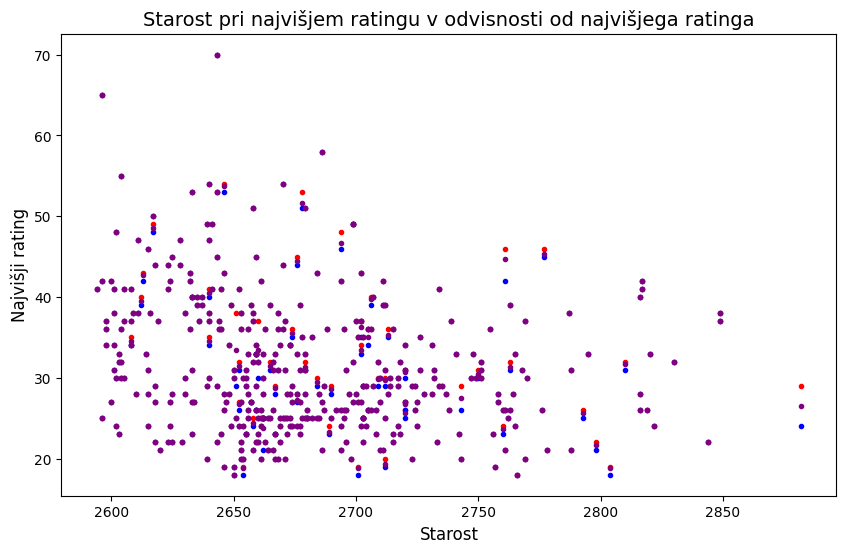

In [ ]:
shp = sahisti_elo_pandas
shp = shp[shp['Povprečna starost pri najvišjem ratingu'] - (2024 - shp['Leto rojstva']) <= 0.5]

for sahist in sahisti_elo:
    if sahist['Najvišji rating'] > 2850:
        print(sahist['Ime'], sahist['Maksimumi'])

print(f'Povprečna starost pri kateri šahist doseže svoj najvišji ELO rating je približno {round(mean(shp['Povprečna starost pri najvišjem ratingu']), 2)}. \nBralcu ob tej ugotovitvi puščam nekaj trenutkov za kontemplacijo o svoji smrtnosti ter življenskih dosežkih.')
#Bralcu ob tej ugotovitvi puščam nekaj trenutkov za kontemplacijo o svoji smrtnosti ter življenskih dosežkih.

plot.figure(figsize=(10,6))
plot.scatter(shp['Najvišji rating'], shp['Največja starost pri najvišjem ratingu'], label='Največja starost pri najvišjem ratingu v odvisnosti od ratinga', color='red', marker='.')
plot.scatter(shp['Najvišji rating'], shp['Najmlajša starost pri najvišjem ratingu'], label='Najmlajša starost pri najvišjem ratingu v odvisnosti od ratinga', color='blue', marker='.')
plot.scatter(shp['Najvišji rating'], shp['Povprečna starost pri najvišjem ratingu'], label='Povprečna starost pri najvišjem ratingu v odvisnosti od ratinga', color='purple', marker='.')



plot.title('Starost pri najvišjem ratingu v odvisnosti od najvišjega ratinga', fontsize = 14)
plot.ylabel('Najvišji rating', fontsize=12)
plot.xlabel('Starost', fontsize=12)

plot.show()

Ugotovili smo, da je med najboljšimi 100 šahisti na svetu povprečna starost, pri kateri dosežejo svoj največji ELO rating (kar verjetno sovpada z njihovo najvišjo sposobnostjo v igri šaha), priblžno 31.24. 

Diagram prikazuje starost pri kateri igralci dosežejo svoj najvišji rating. Vijolične točke predstavljajo povprečno starost posameznika, ko je dosegel svoj najvišji rating, modra in rdeča pa zaporedoma najnižjo in najvišjo starost ko je dosegel svoj najvišji rating.

Žal ne opazimo nobenega trenda v podatkih, je pa vredno omembe, da skoraj vsi igralci dosežejo svoj najvišji rating le enkrat v življenju, ter se na isti nivo ne povzpnejo ponovno. Izjema je Magnus Carlsen, ki je svoj najvišji rating 2882 ELO dosegel 05-2014 ter 08-2019. Da je Magnus Carlsen izjema, pa ni prav veliko presenečenje.

Za glavno jed bomo analizirali trende v ELO ratingu top 5 igralcev za obdobje zadnjih 24 let. Zakaj ravno top 5? Eden izmed razlogov je, da želimo te trende grafično prikazati, kar bi bilo težko za več kot 400 šahistov, za katere imamo podatke. 

To pomeni, da bomo za vsakega igralca, ki je v zadnjih 24 letih vstopil v top 5 igralcev, zabeležili ELO rating za vsak mesec, za katerega imamo podatke(sepravi za vsak mesec, ko je bil med najboljšimi 100 šahisti na svetu). Podatke bomo grafično predstavili kot zlomljenko.

{15: 2627.57, 16: 2668.33, 17: 2684.71, 18: 2702.22, 19: 2715.18, 20: 2731.21, 21: 2740.15, 22: 2749.06, 23: 2758.54, 24: 2770.35, 25: 2767.1, 26: 2769.64, 27: 2770.54, 28: 2772.53, 29: 2771.13, 30: 2770.04, 31: 2771.56, 32: 2770.39, 33: 2759.15, 34: 2754.04, 35: 2756.91, 36: 2751.24, 37: 2746.95, 38: 2745.07, 39: 2736.77, 40: 2740.76, 41: 2730.95, 42: 2732.92, 43: 2738.11, 44: 2723.05, 45: 2727.47, 46: 2737.21, 47: 2712.45, 48: 2723.35, 49: 2712.05, 50: 2706.22, 51: 2695.29, 52: 2700.25, 53: 2720.95, 54: 2753.0, 55: 2750.25}
[28]


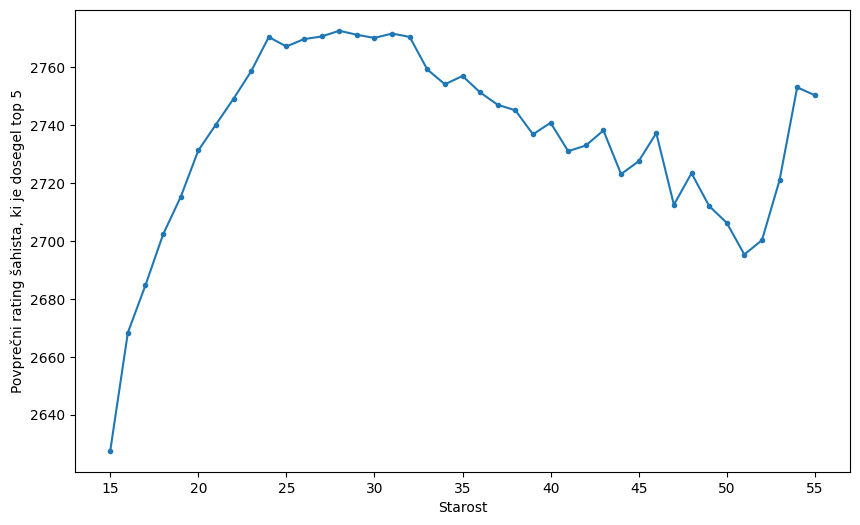

In [ ]:
#Ker nimamo podatkov o ratingu vsakeka izmed šahistov v podatki_top_nekaj(5) za vsako starost, bodisi ker starosti še niso dosegli, ker pri določeni starosti niso bili med najboljšimi 100 šahisti,
#bodisi ker so to starost dosegli pred letom 2000, bomo do podatkov o povprečju prišli na naslednji način.
povprecni_elo_pri_starosti_top_5 = {i: [] for i in range(15, 56)}
sahisti_v_top_5 = podatki_top_nekaj(5)
counter = 0
for sahist, leto_rojstva in sahisti_v_top_5:
    sahistov_record = pd.read_csv(funkcije.ime_v_pot(sahist), index_col = 'datum')
    for datum, vrstica in sahistov_record.iterrows():
        leto = int(datum[3::])
        if leto - leto_rojstva >= 15 and leto - leto_rojstva <= 55:
            povprecni_elo_pri_starosti_top_5[leto - leto_rojstva].append(vrstica['rating'])

povprecje_2 = {i: [] for i in range(15, 56)}
for starost in povprecni_elo_pri_starosti_top_5:
    vsota = sum(povprecni_elo_pri_starosti_top_5[starost])
    dolzina = len(povprecni_elo_pri_starosti_top_5[starost])
    povprecje_2[starost] = round(vsota / dolzina, 2)

print(povprecje_2)

velikostni_ekstrem = []
najvisji = max(list(povprecje_2.values()))
for starost, rating_pri_starosti in povprecje_2.items():
    if rating_pri_starosti == najvisji:
        velikostni_ekstrem.append(starost)

print(velikostni_ekstrem)


pandas_thing = pd.Series(povprecje_2)

plot.figure(figsize=(10,6))

pandas_thing.plot(kind = 'line', marker = '.')

plot.xlabel('Starost')
plot.ylabel('Povprečni rating šahista, ki je dosegel top 5')
plot.show()

{15: 2627.57, 16: 2668.33, 17: 2684.71, 18: 2702.22, 19: 2715.18, 20: 2731.21, 21: 2740.15, 22: 2749.06, 23: 2758.54, 24: 2770.35, 25: 2767.1, 26: 2769.64, 27: 2770.54, 28: 2772.53, 29: 2771.13, 30: 2770.04, 31: 2771.56, 32: 2770.39, 33: 2759.15, 34: 2754.04, 35: 2756.91, 36: 2751.24, 37: 2746.95, 38: 2745.07, 39: 2736.77, 40: 2740.76, 41: 2730.95, 42: 2732.92, 43: 2738.11, 44: 2723.05, 45: 2727.47, 46: 2737.21, 47: 2712.45, 48: 2723.35, 49: 2712.05, 50: 2706.22, 51: 2695.29, 52: 2700.25, 53: 2720.95, 54: 2753.0, 55: 2750.25}
[28]


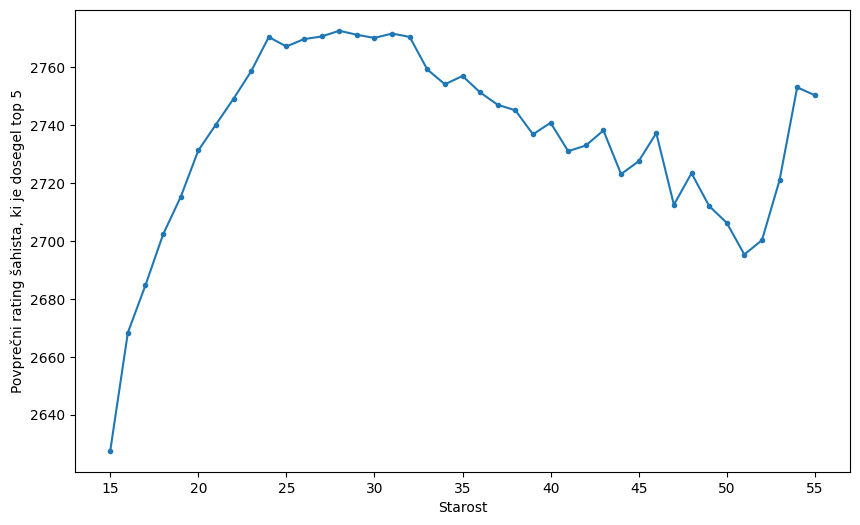

In [ ]:
#Ker nimamo podatkov o ratingu vsakeka izmed šahistov v podatki_top_nekaj(5) za vsako starost, bodisi ker starosti še niso dosegli, ker pri določeni starosti niso bili med najboljšimi 100 šahisti,
#bodisi ker so to starost dosegli pred letom 2000, bomo do podatkov o povprečju prišli na naslednji način.
povprecni_elo_pri_starosti_top_5 = {i: [] for i in range(15, 56)}
sahisti_v_top_5 = podatki_top_nekaj(100)
counter = 0
for sahist, leto_rojstva in sahisti_v_top_5:
    sahistov_record = pd.read_csv(os.path.join(p.pot_globoka, sahist.replace(' ', '_')), index_col = 'datum')
    for datum, vrstica in sahistov_record.iterrows():
        leto = int(datum[3::])
        if leto - leto_rojstva >= 15 and leto - leto_rojstva <= 55:
            povprecni_elo_pri_starosti_top_5[leto - leto_rojstva].append(vrstica['rating'])

povprecje_2 = {i: [] for i in range(15, 56)}
for starost in povprecni_elo_pri_starosti_top_5:
    vsota = sum(povprecni_elo_pri_starosti_top_5[starost])
    dolzina = len(povprecni_elo_pri_starosti_top_5[starost])
    povprecje_2[starost] = round(vsota / dolzina, 2)

print(povprecje_2)

velikostni_ekstrem = []
najvisji = max(list(povprecje_2.values()))
for starost, rating_pri_starosti in povprecje_2.items():
    if rating_pri_starosti == najvisji:
        velikostni_ekstrem.append(starost)

print(velikostni_ekstrem)


pandas_thing = pd.Series(povprecje_2)

plot.figure(figsize=(10,6))

pandas_thing.plot(kind = 'line', marker = '.')

plot.xlabel('Starost')
plot.ylabel('Povprečni rating šahista, ki je dosegel top 5')
plot.show()

Opazimo podoben trend, kot smo ga videli pri

Kaj pa za k=1 ?

In [ ]:
data_top_1 = {}
for ime, leto_rojstva in podatki_top_nekaj(1):
    data_top_1[(ime, leto_rojstva)] = pd.read_csv(funkcije.ime_v_pot(ime))

plot.figure(figsize=(10,6))

for kljucni_nabor, podatki in data_top_1.items():
    plot.plot(list(map(lambda x: datum_to_age_float(x, kljucni_nabor[1]), podatki['datum'])), podatki['rating'], label = kljucni_nabor[0])

plot.title('Rating v odvisnosti od starosti za najboljše šahiste preteklih 24 let')
plot.legend()
plot.show()

NameError: name 'datum_to_age_float' is not defined

<Figure size 1000x600 with 0 Axes>